# Linear Regression

# Setup

In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn as nn

In [3]:
# Settings
TRUE_W = 10.0
TRUE_b = -3.0
NUM_EXAMPLES = 100

# Hyperparameters
LEARNING_RATE = 0.1
NUM_EPOCH = 10
BATCH_SIZE = NUM_EXAMPLES

# Prepare Data

In [4]:
class LinearDataset(torch.utils.data.Dataset):

    def __init__(self, w, b, num_examples):
      # Generate random data samples
      self.inputs = torch.randn(num_examples)
      
      # y = w * x + b
      self.true = self.inputs * w + b

      noise = torch.randn(num_examples)
      self.labels = self.inputs * w + b + noise
      
    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.labels[idx]

    def plot(self):
      plt.scatter(self.inputs, self.labels, c='b')
      plt.scatter(self.inputs, self.true, c='r')
      plt.legend(['training data', 'true'])
      plt.show()

    def get_data(self):
      return self.inputs, self.labels

In [5]:
# Create training dataloader
train_set = LinearDataset(TRUE_W, TRUE_b, NUM_EXAMPLES)
train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True)

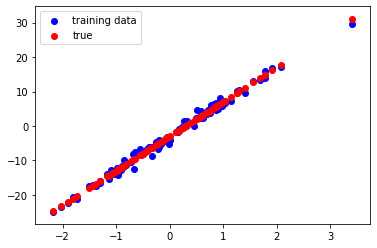

In [6]:
train_set.plot()

# Model

In [7]:
# Linear Regression model
class LinearRegression(nn.Module):

    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

        # Initialize weights and bias
        self.linear.weight.data.fill_(5)
        self.linear.bias.data.fill_(0)

    def forward(self, x):
        x = self.linear(x)
        return x

In [8]:
net = LinearRegression()


# Loss Function

In [9]:
# Define loss function
criterion = nn.MSELoss()

# Optimizer

In [10]:
# Define optimizer
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE)

# Training the Model

In [11]:
Ws = []
bs = []

for epoch in range(NUM_EPOCH):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0): # learn from 1 batch
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.unsqueeze(1)
        labels = labels.unsqueeze(1)

        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward propagation
        outputs = net(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward propagation
        loss.backward()

        # Optimize
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 1 == 0:    # print every 2000 mini-batches
            print('Epoch: %d | Batch: %5d | Loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    # Accumulate predictions
    Ws.append(float(net.linear.weight.data[0][0].numpy()))
    bs.append(float(net.linear.bias[0].detach().numpy()))

print('Finished Training')

Epoch: 1 | Batch:     1 | Loss: 0.018
Epoch: 2 | Batch:     1 | Loss: 0.011
Epoch: 3 | Batch:     1 | Loss: 0.007
Epoch: 4 | Batch:     1 | Loss: 0.005
Epoch: 5 | Batch:     1 | Loss: 0.003
Epoch: 6 | Batch:     1 | Loss: 0.002
Epoch: 7 | Batch:     1 | Loss: 0.002
Epoch: 8 | Batch:     1 | Loss: 0.001
Epoch: 9 | Batch:     1 | Loss: 0.001
Epoch: 10 | Batch:     1 | Loss: 0.001
Finished Training


# Evaluation

In [12]:
pred_W = Ws[-1]
pred_b = bs[-1]
print('Predicted W: ', pred_W, 'predicted b: ', pred_b)

Predicted W:  9.455764770507812 predicted b:  -2.695199489593506


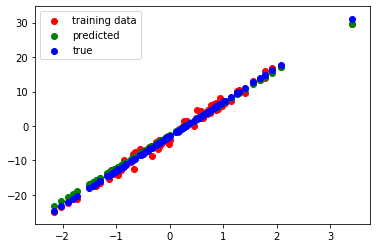

In [13]:
inputs, labels = train_set.get_data()

inputs = inputs.numpy()
labels = labels.numpy()

pred_line = pred_W * inputs + pred_b
true_line = TRUE_W * inputs + TRUE_b

plt.scatter(inputs, labels, c='r')
plt.scatter(inputs, pred_line, c='g')
plt.scatter(inputs, true_line, c='b')
plt.legend(['training data', 'predicted', 'true'])
plt.show()

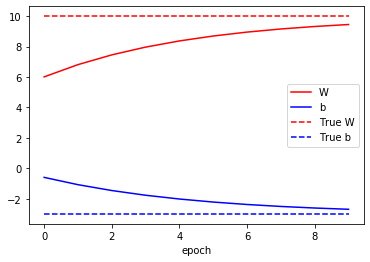

In [14]:
plt.plot(range(NUM_EPOCH), Ws, 'r',
         range(NUM_EPOCH), bs, 'b')
plt.plot([TRUE_W] * NUM_EPOCH, 'r--',
         [TRUE_b] * NUM_EPOCH, 'b--')
plt.xlabel('epoch')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()